In [1]:
# importing the all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data
df=pd.read_csv('/content/50_Startups.csv')

In [3]:
#Displaying the first 5 rows
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Displaying the last 5 rows
df.tail(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
# Rows and the columns
df.shape

(50, 5)

In [6]:
# Columns names
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
# checking the null values in the data set
df.isnull().sum().sum()

np.int64(0)

In [8]:
#checking the duplicates in the data
df.duplicated().sum()

np.int64(0)

In [9]:
# checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
#Stastical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [11]:
# checking the data types
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


## **EDA**

In [12]:
# numerical columns
num_col=df.select_dtypes(include=np.number).columns
print(num_col)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


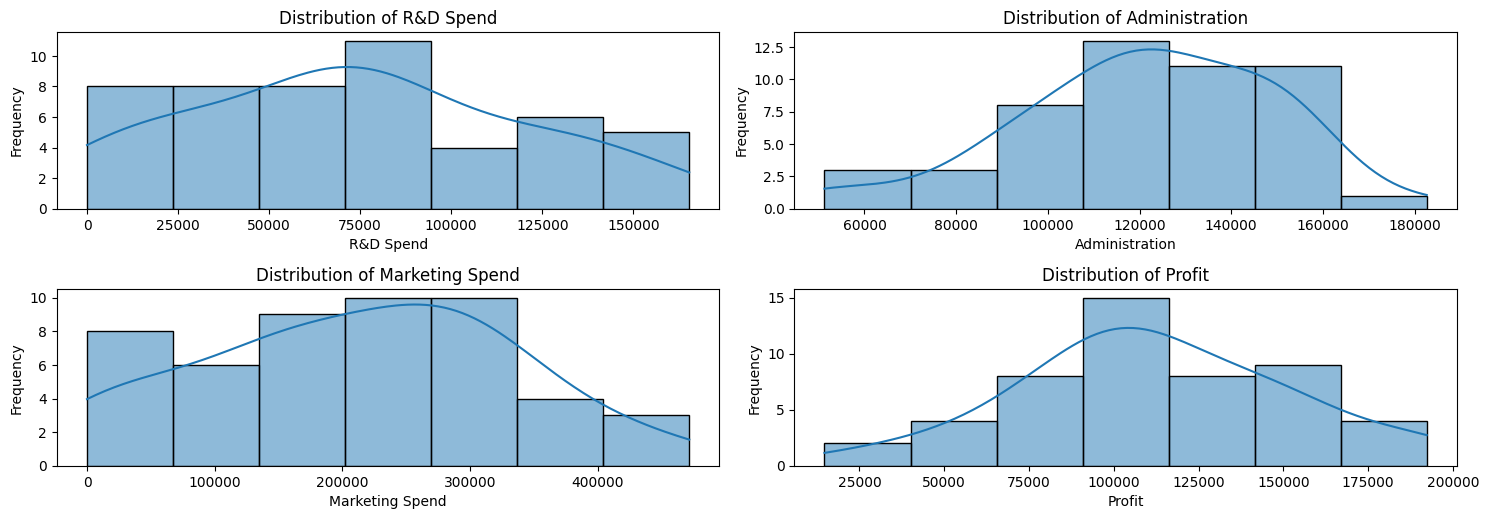

In [13]:
# histogram on the numerical columns
plt.figure(figsize=(15,10))  # Define figure once

for i, col in enumerate(num_col):
    plt.subplot(4, 2, i+1)  # Adjusted to fit 8 subplots
    sns.histplot(df[col],kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Prevent overlap
plt.show()

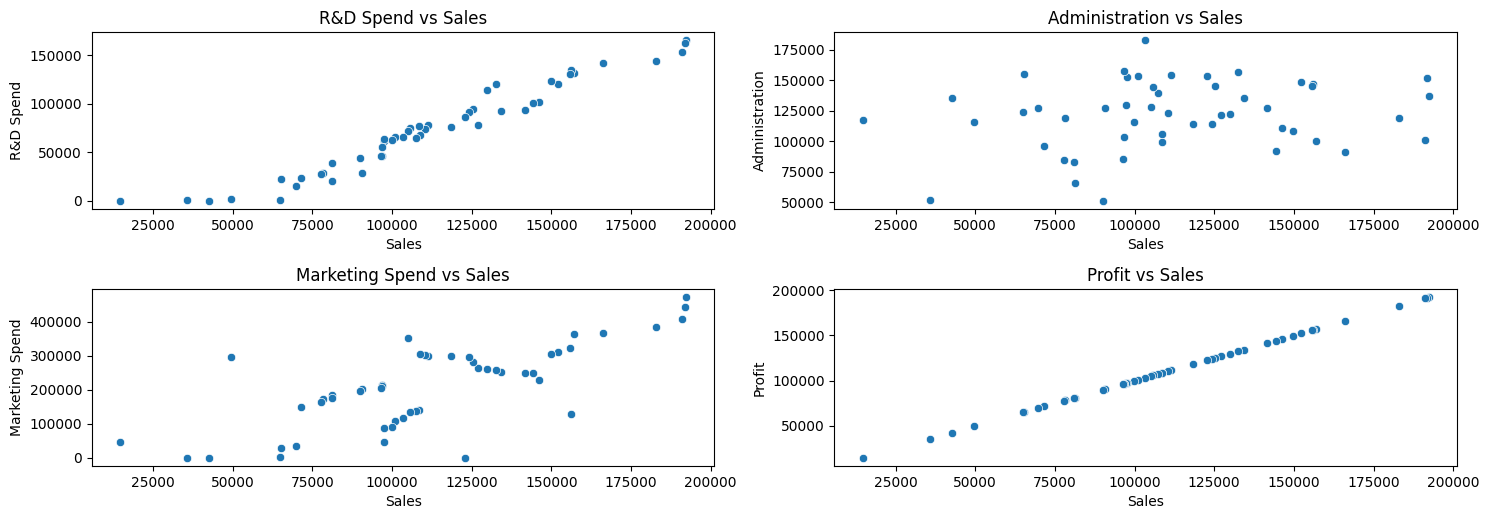

In [14]:
#scatterplot on the numerical columns
plt.figure(figsize=(15,10))  # Define figure once

for i, col in enumerate(num_col):
    plt.subplot(4, 2, i+1)  # Adjusted to fit 8 subplots
    sns.scatterplot(x='Profit',y=df[col],data=df)
    plt.xlabel('Sales')
    plt.ylabel(col)
    plt.title(f'{col} vs Sales')

plt.tight_layout()  # Prevent overlap
plt.show()

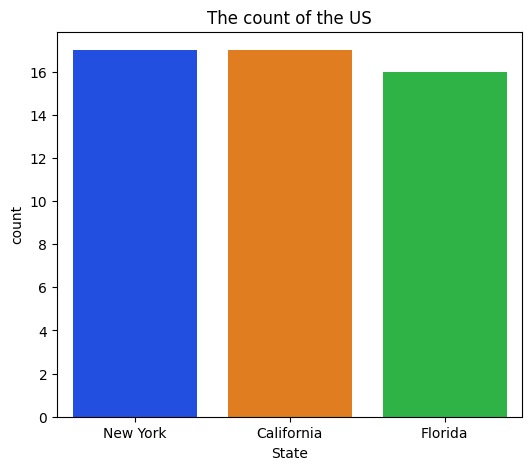

In [15]:
# count plot
plt.figure(figsize=(6,5))  # Define figure once
sns.countplot(x='State',data=df,palette='bright')
plt.title("The count of the US")
plt.show()

In [16]:
# value_count of the states
count=df.value_counts('State')
print("\033[32m"+f"{count}")

State
California    17
New York      17
Florida       16
Name: count, dtype: int64


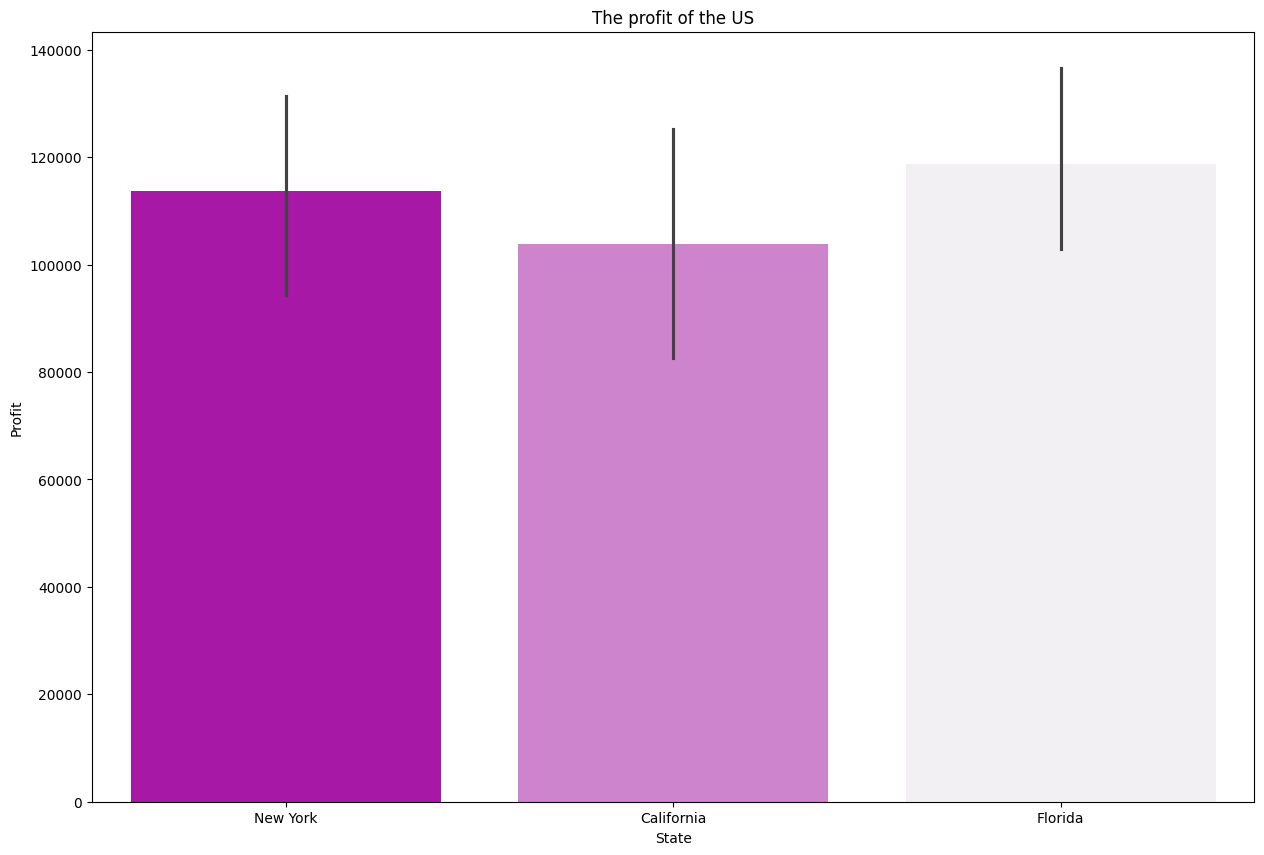

In [17]:
#barplot of the profit vs State
plt.figure(figsize=(15,10))
sns.barplot(x="State",y="Profit",data=df,palette="light:m_r")
plt.title("The profit of the US")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

In [18]:
round(np.mean(df["Profit"]),2)

np.float64(112012.64)

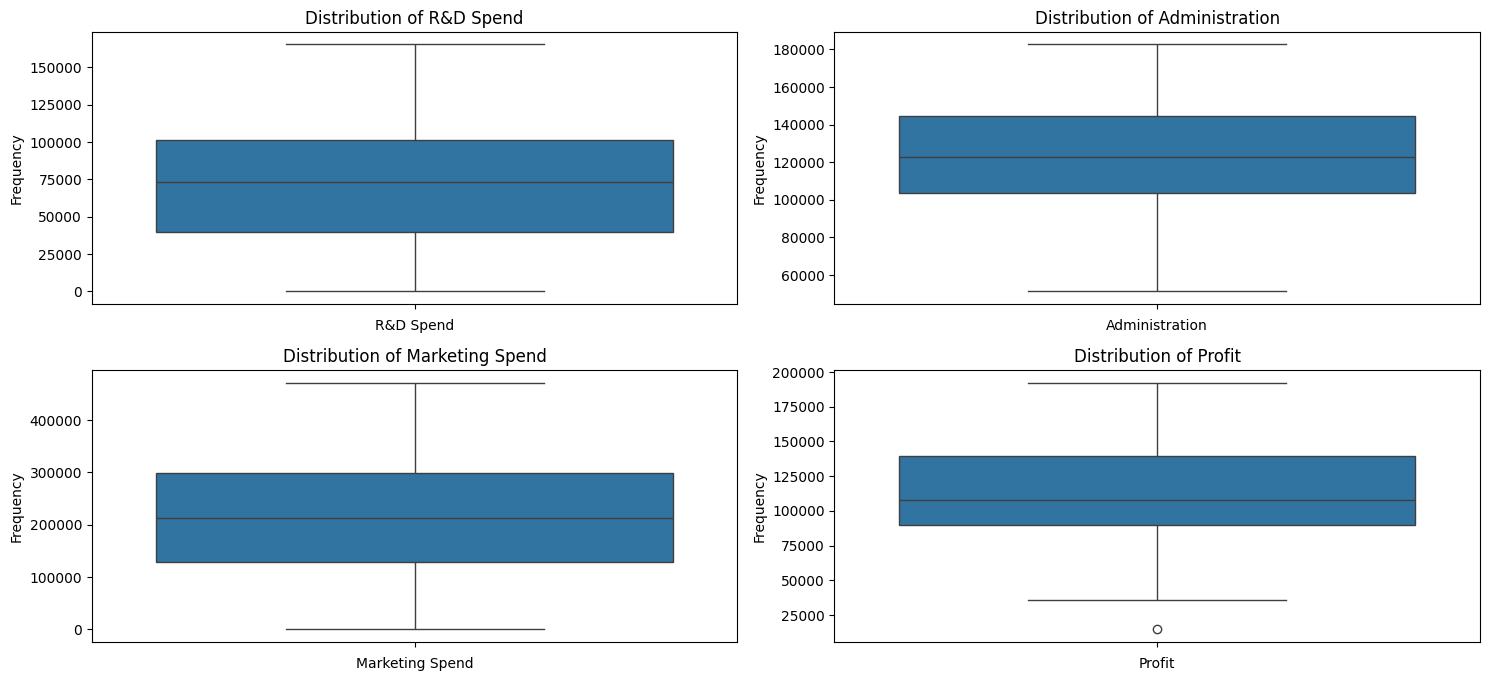

In [19]:
# Finding the outliers
plt.figure(figsize=(15,10))  # Define figure once

for i, col in enumerate(num_col):
    plt.subplot(3, 2, i+1)  # Adjusted to fit  subplots
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Prevent overlap
plt.show()

In [20]:
# Treating the outliers
for col in num_col:
 Q1 = df[col].quantile(0.25)
 Q3 = df[col].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

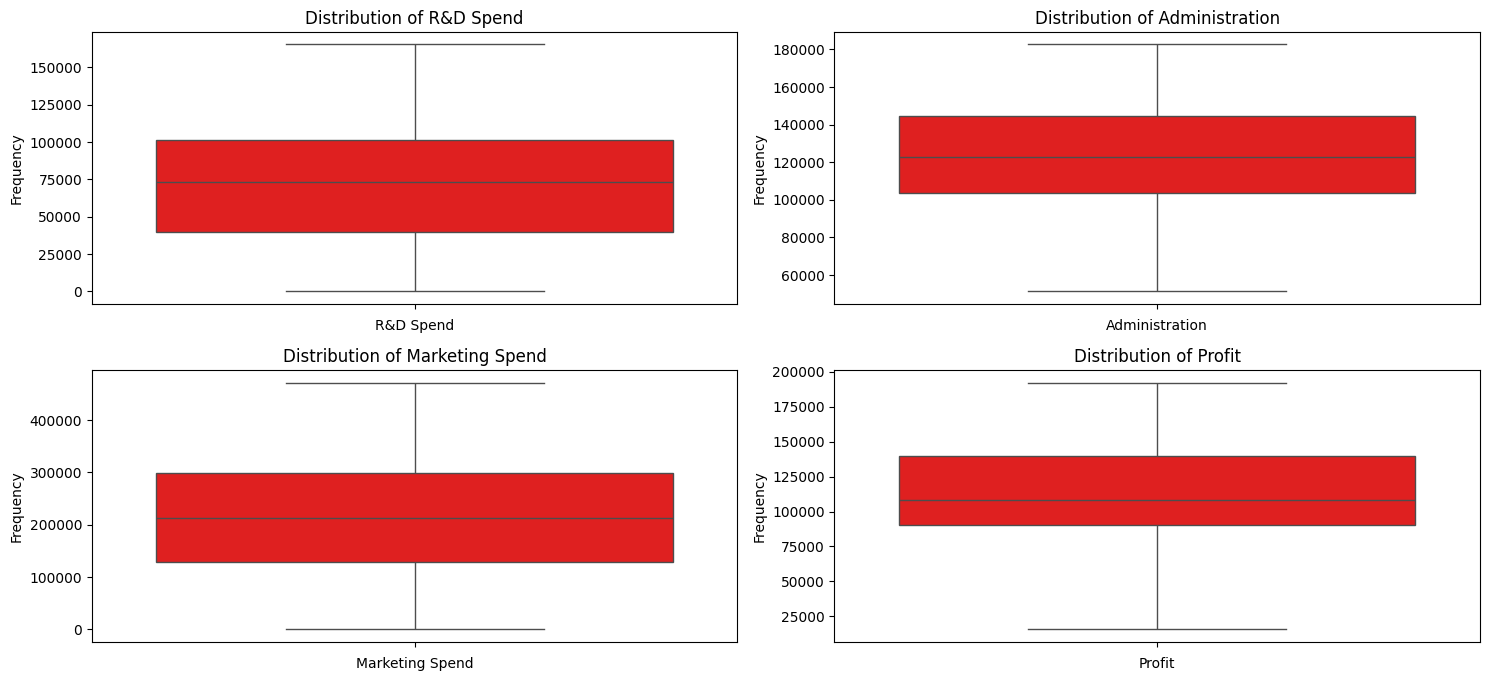

In [21]:
# Checking the outliers in the data
plt.figure(figsize=(15,10))  # Define figure once

for i, col in enumerate(num_col):
    plt.subplot(3, 2, i+1)  # Adjusted to fit  subplots
    sns.boxplot(df[col],color="r")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Prevent overlap
plt.show()

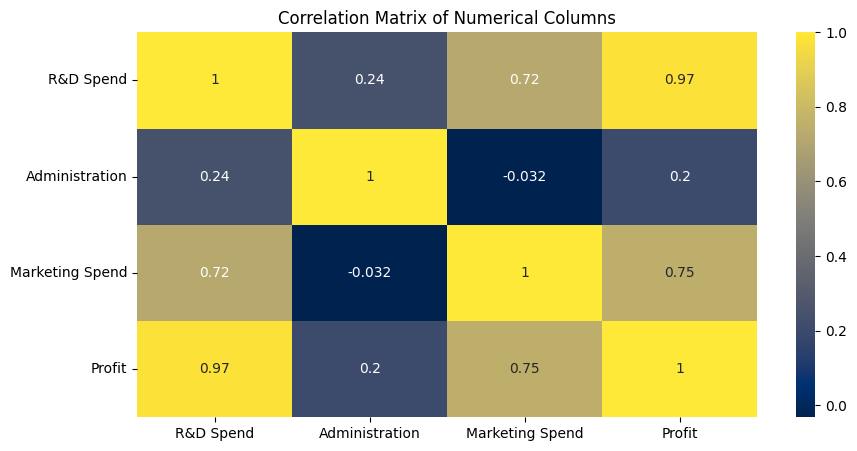

In [22]:
#Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df[num_col].corr(),annot=True, cmap='cividis')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [23]:
#lable encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["State"]=le.fit_transform(df["State"])

In [24]:
# Importing the labraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
# splitting the data into the taget and feature variable
x=df.drop("Profit",axis=1)
y=df["Profit"]

In [26]:
#splitting the data into the train test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)

In [28]:
# fitting the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
# predecting the data
y_pred=model.predict(x_test)

In [30]:
#evaluation of the matrix
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 80736596.91146421
R2 Score: 0.9002995959902258


## **Conclusion**

--> From the above given data we can see that the there are the five columns they are the 'R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'   
-->We have the Cleaned the data like the Checking the null,duplicates,Stastical information of the data and data types  
-->In this data set we have ploted the plotes like the Histogram we have checked the distribution of the data in the data we have observed that the there is normally distributed   
--> With the help of the scatterplot we have observed that the releation of the data points to wards to the other variables  
--> We have also find the some of the outliers in the data set and we removed with the help of the iqr method   
-->In the correleation we find the high corr between the ind and the dep var we find the high corr inthe r&d and the profit it is the good for the model  
-->We have used the mlr for the model and we got the better r2 score for the data set   
